http://repositorium.sdum.uminho.pt/bitstream/1822/30994/1/dss-v3.pdf

In [1]:
#need to install lightgbm from anacondra prompt

In [55]:
#Data Preparation
#We will now import some required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import auc, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline
import matplotlib.pyplot as plt

#Loading the dataset
dataset = pd.read_csv('bank-additional-full.csv')
dataset = dataset.drop(['emp.var.rate','nr.employed', 'duration'], axis=1)
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no


In [56]:
dataset.describe()

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,93.575664,-40.502600,3.621291
std,10.42125,2.770014,186.910907,0.494901,0.578840,4.628198,1.734447
min,17.00000,1.000000,0.000000,0.000000,92.201000,-50.800000,0.634000
25%,32.00000,1.000000,999.000000,0.000000,93.075000,-42.700000,1.344000
50%,38.00000,2.000000,999.000000,0.000000,93.749000,-41.800000,4.857000
75%,47.00000,3.000000,999.000000,0.000000,93.994000,-36.400000,4.961000
max,98.00000,56.000000,999.000000,7.000000,94.767000,-26.900000,5.045000


In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
y                 41188 non-null object
dtypes: float64(3), int64(4), object(11)
memory usage: 5.7+ MB


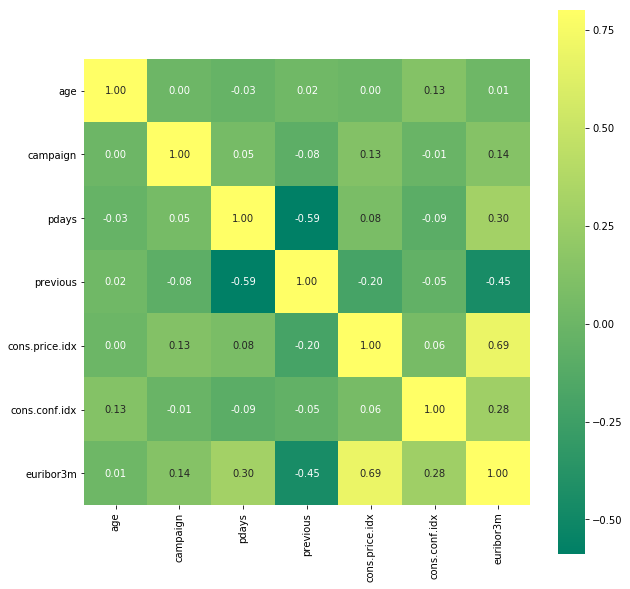

In [58]:
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap = "summer")
plt.show()

In [59]:
# Check for null values. 
dataset.isnull().sum().sort_values(ascending=False)

y                 0
euribor3m         0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
cons.price.idx    0
cons.conf.idx     0
age               0
dtype: int64

In [60]:
#One Hot Encoding all Catergorical Variables without Order
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['job','marital','education','default','housing','loan','contact','poutcome','month','day_of_week'])
dataset = encoder.fit_transform(dataset)

# Encoding Outcome Row to Binary
#dataset['outcome'] = dataset['outcome'].map({'yes': 1, 'no': 0})
dataset['y'] = dataset['y'].map({'yes': 1, 'no': 0})

In [61]:
# splitting data
X = dataset.drop(['y'], axis=1)
y = dataset['y']

In [62]:
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=20)
X_train.shape

(35009, 42)

In [63]:
from sklearn.model_selection import GridSearchCV
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 50)


param_grid = {
    'n_estimators': [x for x in range(20, 36, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2],
#    'num_leaves': [x for x in range(20,100, 10)],
#    'boosting': ['gbdt', 'dart']
            }
    
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)

C:\Users\barba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's binary_logloss: 0.329391	valid_0's auc: 0.775912	valid_0's l1: 0.194704
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.317337	valid_0's auc: 0.777341	valid_0's l1: 0.190658
[3]	valid_0's binary_logloss: 0.308829	valid_0's auc: 0.778006	valid_0's l1: 0.187077
[4]	valid_0's binary_logloss: 0.302354	valid_0's auc: 0.779284	valid_0's l1: 0.183811
[5]	valid_0's binary_logloss: 0.297184	valid_0's auc: 0.782688	valid_0's l1: 0.180897
[6]	valid_0's binary_logloss: 0.292798	valid_0's auc: 0.789154	valid_0's l1: 0.178138
[7]	valid_0's binary_logloss: 0.28963	valid_0's auc: 0.788388	valid_0's l1: 0.175688
[8]	valid_0's binary_logloss: 0.287016	valid_0's auc: 0.788921	valid_0's l1: 0.173502
[9]	valid_0's binary_logloss: 0.284678	valid_0's auc: 0.789912	valid_0's l1: 0.171485
[10]	valid_0's binary_logloss: 0.282897	valid_0's auc: 0.790783	valid_0's l1: 0.169685
[11]	valid_0's binary_logloss: 0.281266	valid_0's auc: 0.792051	valid_0's l1: 0

[1]	valid_0's binary_logloss: 0.328974	valid_0's auc: 0.776764	valid_0's l1: 0.194788
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.316337	valid_0's auc: 0.784191	valid_0's l1: 0.190678
[3]	valid_0's binary_logloss: 0.307176	valid_0's auc: 0.785564	valid_0's l1: 0.186879
[4]	valid_0's binary_logloss: 0.300699	valid_0's auc: 0.78803	valid_0's l1: 0.183618
[5]	valid_0's binary_logloss: 0.295371	valid_0's auc: 0.78929	valid_0's l1: 0.180705
[6]	valid_0's binary_logloss: 0.291239	valid_0's auc: 0.789922	valid_0's l1: 0.177995
[7]	valid_0's binary_logloss: 0.288268	valid_0's auc: 0.789829	valid_0's l1: 0.175662
[8]	valid_0's binary_logloss: 0.285858	valid_0's auc: 0.788926	valid_0's l1: 0.173534
[9]	valid_0's binary_logloss: 0.283351	valid_0's auc: 0.790373	valid_0's l1: 0.171449
[10]	valid_0's binary_logloss: 0.28131	valid_0's auc: 0.791367	valid_0's l1: 0.169589
[11]	valid_0's binary_logloss: 0.279713	valid_0's auc: 0.792973	valid_0's l1: 0.1

[1]	valid_0's binary_logloss: 0.329442	valid_0's auc: 0.774548	valid_0's l1: 0.194753
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.317232	valid_0's auc: 0.775712	valid_0's l1: 0.190698
[3]	valid_0's binary_logloss: 0.30874	valid_0's auc: 0.775177	valid_0's l1: 0.187072
[4]	valid_0's binary_logloss: 0.301721	valid_0's auc: 0.780659	valid_0's l1: 0.183739
[5]	valid_0's binary_logloss: 0.296442	valid_0's auc: 0.78147	valid_0's l1: 0.180695
[6]	valid_0's binary_logloss: 0.292441	valid_0's auc: 0.781413	valid_0's l1: 0.178107
[7]	valid_0's binary_logloss: 0.289255	valid_0's auc: 0.784321	valid_0's l1: 0.175723
[8]	valid_0's binary_logloss: 0.28678	valid_0's auc: 0.78489	valid_0's l1: 0.173583
[9]	valid_0's binary_logloss: 0.284666	valid_0's auc: 0.78545	valid_0's l1: 0.171628
[10]	valid_0's binary_logloss: 0.282813	valid_0's auc: 0.787737	valid_0's l1: 0.169869
[11]	valid_0's binary_logloss: 0.281405	valid_0's auc: 0.786903	valid_0's l1: 0.168

[1]	valid_0's binary_logloss: 0.329391	valid_0's auc: 0.775912	valid_0's l1: 0.194704
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.317337	valid_0's auc: 0.777341	valid_0's l1: 0.190658
[3]	valid_0's binary_logloss: 0.308829	valid_0's auc: 0.778006	valid_0's l1: 0.187077
[4]	valid_0's binary_logloss: 0.302354	valid_0's auc: 0.779284	valid_0's l1: 0.183811
[5]	valid_0's binary_logloss: 0.297184	valid_0's auc: 0.782688	valid_0's l1: 0.180897
[6]	valid_0's binary_logloss: 0.292798	valid_0's auc: 0.789154	valid_0's l1: 0.178138
[7]	valid_0's binary_logloss: 0.28963	valid_0's auc: 0.788388	valid_0's l1: 0.175688
[8]	valid_0's binary_logloss: 0.287016	valid_0's auc: 0.788921	valid_0's l1: 0.173502
[9]	valid_0's binary_logloss: 0.284678	valid_0's auc: 0.789912	valid_0's l1: 0.171485
[10]	valid_0's binary_logloss: 0.282897	valid_0's auc: 0.790783	valid_0's l1: 0.169685
[11]	valid_0's binary_logloss: 0.281266	valid_0's auc: 0.792051	valid_0's l1: 0

[1]	valid_0's binary_logloss: 0.329442	valid_0's auc: 0.774548	valid_0's l1: 0.194753
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.317232	valid_0's auc: 0.775712	valid_0's l1: 0.190698
[3]	valid_0's binary_logloss: 0.30874	valid_0's auc: 0.775177	valid_0's l1: 0.187072
[4]	valid_0's binary_logloss: 0.301721	valid_0's auc: 0.780659	valid_0's l1: 0.183739
[5]	valid_0's binary_logloss: 0.296442	valid_0's auc: 0.78147	valid_0's l1: 0.180695
[6]	valid_0's binary_logloss: 0.292441	valid_0's auc: 0.781413	valid_0's l1: 0.178107
[7]	valid_0's binary_logloss: 0.289255	valid_0's auc: 0.784321	valid_0's l1: 0.175723
[8]	valid_0's binary_logloss: 0.28678	valid_0's auc: 0.78489	valid_0's l1: 0.173583
[9]	valid_0's binary_logloss: 0.284666	valid_0's auc: 0.78545	valid_0's l1: 0.171628
[10]	valid_0's binary_logloss: 0.282813	valid_0's auc: 0.787737	valid_0's l1: 0.169869
[11]	valid_0's binary_logloss: 0.281405	valid_0's auc: 0.786903	valid_0's l1: 0.168

[1]	valid_0's binary_logloss: 0.328974	valid_0's auc: 0.776764	valid_0's l1: 0.194788
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.316337	valid_0's auc: 0.784191	valid_0's l1: 0.190678
[3]	valid_0's binary_logloss: 0.307176	valid_0's auc: 0.785564	valid_0's l1: 0.186879
[4]	valid_0's binary_logloss: 0.300699	valid_0's auc: 0.78803	valid_0's l1: 0.183618
[5]	valid_0's binary_logloss: 0.295371	valid_0's auc: 0.78929	valid_0's l1: 0.180705
[6]	valid_0's binary_logloss: 0.291239	valid_0's auc: 0.789922	valid_0's l1: 0.177995
[7]	valid_0's binary_logloss: 0.288268	valid_0's auc: 0.789829	valid_0's l1: 0.175662
[8]	valid_0's binary_logloss: 0.285858	valid_0's auc: 0.788926	valid_0's l1: 0.173534
[9]	valid_0's binary_logloss: 0.283351	valid_0's auc: 0.790373	valid_0's l1: 0.171449
[10]	valid_0's binary_logloss: 0.28131	valid_0's auc: 0.791367	valid_0's l1: 0.169589
[11]	valid_0's binary_logloss: 0.279713	valid_0's auc: 0.792973	valid_0's l1: 0.1

[1]	valid_0's binary_logloss: 0.324219	valid_0's auc: 0.776764	valid_0's l1: 0.193656
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.310095	valid_0's auc: 0.785483	valid_0's l1: 0.188559
[3]	valid_0's binary_logloss: 0.301143	valid_0's auc: 0.786354	valid_0's l1: 0.184376
[4]	valid_0's binary_logloss: 0.29447	valid_0's auc: 0.790275	valid_0's l1: 0.180618
[5]	valid_0's binary_logloss: 0.289602	valid_0's auc: 0.789704	valid_0's l1: 0.177228
[6]	valid_0's binary_logloss: 0.286016	valid_0's auc: 0.789354	valid_0's l1: 0.174336
[7]	valid_0's binary_logloss: 0.283043	valid_0's auc: 0.791297	valid_0's l1: 0.17172
[8]	valid_0's binary_logloss: 0.280709	valid_0's auc: 0.792821	valid_0's l1: 0.169408
[9]	valid_0's binary_logloss: 0.27878	valid_0's auc: 0.793859	valid_0's l1: 0.167334
[10]	valid_0's binary_logloss: 0.277474	valid_0's auc: 0.795196	valid_0's l1: 0.165558
[11]	valid_0's binary_logloss: 0.27648	valid_0's auc: 0.793771	valid_0's l1: 0.16

[1]	valid_0's binary_logloss: 0.324219	valid_0's auc: 0.776764	valid_0's l1: 0.193656
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.310095	valid_0's auc: 0.785483	valid_0's l1: 0.188559
[3]	valid_0's binary_logloss: 0.301143	valid_0's auc: 0.786354	valid_0's l1: 0.184376
[4]	valid_0's binary_logloss: 0.29447	valid_0's auc: 0.790275	valid_0's l1: 0.180618
[5]	valid_0's binary_logloss: 0.289602	valid_0's auc: 0.789704	valid_0's l1: 0.177228
[6]	valid_0's binary_logloss: 0.286016	valid_0's auc: 0.789354	valid_0's l1: 0.174336
[7]	valid_0's binary_logloss: 0.283043	valid_0's auc: 0.791297	valid_0's l1: 0.17172
[8]	valid_0's binary_logloss: 0.280709	valid_0's auc: 0.792821	valid_0's l1: 0.169408
[9]	valid_0's binary_logloss: 0.27878	valid_0's auc: 0.793859	valid_0's l1: 0.167334
[10]	valid_0's binary_logloss: 0.277474	valid_0's auc: 0.795196	valid_0's l1: 0.165558
[11]	valid_0's binary_logloss: 0.27648	valid_0's auc: 0.793771	valid_0's l1: 0.16

[1]	valid_0's binary_logloss: 0.324219	valid_0's auc: 0.776764	valid_0's l1: 0.193656
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.310095	valid_0's auc: 0.785483	valid_0's l1: 0.188559
[3]	valid_0's binary_logloss: 0.301143	valid_0's auc: 0.786354	valid_0's l1: 0.184376
[4]	valid_0's binary_logloss: 0.29447	valid_0's auc: 0.790275	valid_0's l1: 0.180618
[5]	valid_0's binary_logloss: 0.289602	valid_0's auc: 0.789704	valid_0's l1: 0.177228
[6]	valid_0's binary_logloss: 0.286016	valid_0's auc: 0.789354	valid_0's l1: 0.174336
[7]	valid_0's binary_logloss: 0.283043	valid_0's auc: 0.791297	valid_0's l1: 0.17172
[8]	valid_0's binary_logloss: 0.280709	valid_0's auc: 0.792821	valid_0's l1: 0.169408
[9]	valid_0's binary_logloss: 0.27878	valid_0's auc: 0.793859	valid_0's l1: 0.167334
[10]	valid_0's binary_logloss: 0.277474	valid_0's auc: 0.795196	valid_0's l1: 0.165558
[11]	valid_0's binary_logloss: 0.27648	valid_0's auc: 0.793771	valid_0's l1: 0.16

[1]	valid_0's binary_logloss: 0.324219	valid_0's auc: 0.776764	valid_0's l1: 0.193656
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.310095	valid_0's auc: 0.785483	valid_0's l1: 0.188559
[3]	valid_0's binary_logloss: 0.301143	valid_0's auc: 0.786354	valid_0's l1: 0.184376
[4]	valid_0's binary_logloss: 0.29447	valid_0's auc: 0.790275	valid_0's l1: 0.180618
[5]	valid_0's binary_logloss: 0.289602	valid_0's auc: 0.789704	valid_0's l1: 0.177228
[6]	valid_0's binary_logloss: 0.286016	valid_0's auc: 0.789354	valid_0's l1: 0.174336
[7]	valid_0's binary_logloss: 0.283043	valid_0's auc: 0.791297	valid_0's l1: 0.17172
[8]	valid_0's binary_logloss: 0.280709	valid_0's auc: 0.792821	valid_0's l1: 0.169408
[9]	valid_0's binary_logloss: 0.27878	valid_0's auc: 0.793859	valid_0's l1: 0.167334
[10]	valid_0's binary_logloss: 0.277474	valid_0's auc: 0.795196	valid_0's l1: 0.165558
[11]	valid_0's binary_logloss: 0.27648	valid_0's auc: 0.793771	valid_0's l1: 0.16

[1]	valid_0's binary_logloss: 0.319695	valid_0's auc: 0.776764	valid_0's l1: 0.192522
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.305083	valid_0's auc: 0.78555	valid_0's l1: 0.186588
[3]	valid_0's binary_logloss: 0.296055	valid_0's auc: 0.789029	valid_0's l1: 0.181811
[4]	valid_0's binary_logloss: 0.289563	valid_0's auc: 0.790302	valid_0's l1: 0.177549
[5]	valid_0's binary_logloss: 0.285294	valid_0's auc: 0.791173	valid_0's l1: 0.174013
[6]	valid_0's binary_logloss: 0.281913	valid_0's auc: 0.792474	valid_0's l1: 0.17098
[7]	valid_0's binary_logloss: 0.279611	valid_0's auc: 0.793961	valid_0's l1: 0.168391
[8]	valid_0's binary_logloss: 0.27795	valid_0's auc: 0.794323	valid_0's l1: 0.166194
[9]	valid_0's binary_logloss: 0.276794	valid_0's auc: 0.793514	valid_0's l1: 0.164306
[10]	valid_0's binary_logloss: 0.275644	valid_0's auc: 0.794627	valid_0's l1: 0.162602
[11]	valid_0's binary_logloss: 0.274533	valid_0's auc: 0.794365	valid_0's l1: 0.1

[1]	valid_0's binary_logloss: 0.320435	valid_0's auc: 0.774548	valid_0's l1: 0.192475
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.307631	valid_0's auc: 0.77435	valid_0's l1: 0.187092
[3]	valid_0's binary_logloss: 0.298209	valid_0's auc: 0.780065	valid_0's l1: 0.182307
[4]	valid_0's binary_logloss: 0.291899	valid_0's auc: 0.781911	valid_0's l1: 0.178106
[5]	valid_0's binary_logloss: 0.287779	valid_0's auc: 0.783958	valid_0's l1: 0.174738
[6]	valid_0's binary_logloss: 0.284666	valid_0's auc: 0.785092	valid_0's l1: 0.171808
[7]	valid_0's binary_logloss: 0.282706	valid_0's auc: 0.786181	valid_0's l1: 0.169313
[8]	valid_0's binary_logloss: 0.280755	valid_0's auc: 0.787472	valid_0's l1: 0.166905
[9]	valid_0's binary_logloss: 0.279495	valid_0's auc: 0.787346	valid_0's l1: 0.165048
[10]	valid_0's binary_logloss: 0.278506	valid_0's auc: 0.787761	valid_0's l1: 0.163417
[11]	valid_0's binary_logloss: 0.278268	valid_0's auc: 0.786467	valid_0's l1: 0

[25]	valid_0's binary_logloss: 0.272121	valid_0's auc: 0.799939	valid_0's l1: 0.152941
[26]	valid_0's binary_logloss: 0.272068	valid_0's auc: 0.799835	valid_0's l1: 0.152837
[27]	valid_0's binary_logloss: 0.272308	valid_0's auc: 0.799762	valid_0's l1: 0.15285
[28]	valid_0's binary_logloss: 0.272471	valid_0's auc: 0.799822	valid_0's l1: 0.152618
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.272019	valid_0's auc: 0.800095	valid_0's l1: 0.153478
[1]	valid_0's binary_logloss: 0.320286	valid_0's auc: 0.775912	valid_0's l1: 0.192387
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.306666	valid_0's auc: 0.778234	valid_0's l1: 0.186749
[3]	valid_0's binary_logloss: 0.297308	valid_0's auc: 0.788145	valid_0's l1: 0.181857
[4]	valid_0's binary_logloss: 0.290655	valid_0's auc: 0.791422	valid_0's l1: 0.17758
[5]	valid_0's binary_logloss: 0.286398	valid_0's auc: 0.792024	valid_0's l1: 0.174003
[6]	valid_0's binary_logloss: 0.283121	va

[18]	valid_0's binary_logloss: 0.27778	valid_0's auc: 0.785185	valid_0's l1: 0.156365
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.277606	valid_0's auc: 0.78858	valid_0's l1: 0.15979
[1]	valid_0's binary_logloss: 0.319695	valid_0's auc: 0.776764	valid_0's l1: 0.192522
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.305083	valid_0's auc: 0.78555	valid_0's l1: 0.186588
[3]	valid_0's binary_logloss: 0.296055	valid_0's auc: 0.789029	valid_0's l1: 0.181811
[4]	valid_0's binary_logloss: 0.289563	valid_0's auc: 0.790302	valid_0's l1: 0.177549
[5]	valid_0's binary_logloss: 0.285294	valid_0's auc: 0.791173	valid_0's l1: 0.174013
[6]	valid_0's binary_logloss: 0.281913	valid_0's auc: 0.792474	valid_0's l1: 0.17098
[7]	valid_0's binary_logloss: 0.279611	valid_0's auc: 0.793961	valid_0's l1: 0.168391
[8]	valid_0's binary_logloss: 0.27795	valid_0's auc: 0.794323	valid_0's l1: 0.166194
[9]	valid_0's binary_logloss: 0.276794	valid_0's

[1]	valid_0's binary_logloss: 0.316088	valid_0's auc: 0.775912	valid_0's l1: 0.191222
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.302267	valid_0's auc: 0.777172	valid_0's l1: 0.184914
[3]	valid_0's binary_logloss: 0.29282	valid_0's auc: 0.787921	valid_0's l1: 0.179415
[4]	valid_0's binary_logloss: 0.287406	valid_0's auc: 0.789855	valid_0's l1: 0.175036
[5]	valid_0's binary_logloss: 0.283052	valid_0's auc: 0.793241	valid_0's l1: 0.171259
[6]	valid_0's binary_logloss: 0.280022	valid_0's auc: 0.794891	valid_0's l1: 0.168093
[7]	valid_0's binary_logloss: 0.278051	valid_0's auc: 0.795534	valid_0's l1: 0.165457
[8]	valid_0's binary_logloss: 0.276831	valid_0's auc: 0.794166	valid_0's l1: 0.163325
[9]	valid_0's binary_logloss: 0.275994	valid_0's auc: 0.795489	valid_0's l1: 0.161425
[10]	valid_0's binary_logloss: 0.27526	valid_0's auc: 0.795688	valid_0's l1: 0.159949
[11]	valid_0's binary_logloss: 0.274583	valid_0's auc: 0.797272	valid_0's l1: 0.

[1]	valid_0's binary_logloss: 0.316088	valid_0's auc: 0.775912	valid_0's l1: 0.191222
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.302267	valid_0's auc: 0.777172	valid_0's l1: 0.184914
[3]	valid_0's binary_logloss: 0.29282	valid_0's auc: 0.787921	valid_0's l1: 0.179415
[4]	valid_0's binary_logloss: 0.287406	valid_0's auc: 0.789855	valid_0's l1: 0.175036
[5]	valid_0's binary_logloss: 0.283052	valid_0's auc: 0.793241	valid_0's l1: 0.171259
[6]	valid_0's binary_logloss: 0.280022	valid_0's auc: 0.794891	valid_0's l1: 0.168093
[7]	valid_0's binary_logloss: 0.278051	valid_0's auc: 0.795534	valid_0's l1: 0.165457
[8]	valid_0's binary_logloss: 0.276831	valid_0's auc: 0.794166	valid_0's l1: 0.163325
[9]	valid_0's binary_logloss: 0.275994	valid_0's auc: 0.795489	valid_0's l1: 0.161425
[10]	valid_0's binary_logloss: 0.27526	valid_0's auc: 0.795688	valid_0's l1: 0.159949
[11]	valid_0's binary_logloss: 0.274583	valid_0's auc: 0.797272	valid_0's l1: 0.

[1]	valid_0's binary_logloss: 0.316088	valid_0's auc: 0.775912	valid_0's l1: 0.191222
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.302267	valid_0's auc: 0.777172	valid_0's l1: 0.184914
[3]	valid_0's binary_logloss: 0.29282	valid_0's auc: 0.787921	valid_0's l1: 0.179415
[4]	valid_0's binary_logloss: 0.287406	valid_0's auc: 0.789855	valid_0's l1: 0.175036
[5]	valid_0's binary_logloss: 0.283052	valid_0's auc: 0.793241	valid_0's l1: 0.171259
[6]	valid_0's binary_logloss: 0.280022	valid_0's auc: 0.794891	valid_0's l1: 0.168093
[7]	valid_0's binary_logloss: 0.278051	valid_0's auc: 0.795534	valid_0's l1: 0.165457
[8]	valid_0's binary_logloss: 0.276831	valid_0's auc: 0.794166	valid_0's l1: 0.163325
[9]	valid_0's binary_logloss: 0.275994	valid_0's auc: 0.795489	valid_0's l1: 0.161425
[10]	valid_0's binary_logloss: 0.27526	valid_0's auc: 0.795688	valid_0's l1: 0.159949
[11]	valid_0's binary_logloss: 0.274583	valid_0's auc: 0.797272	valid_0's l1: 0.

[1]	valid_0's binary_logloss: 0.316088	valid_0's auc: 0.775912	valid_0's l1: 0.191222
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.302267	valid_0's auc: 0.777172	valid_0's l1: 0.184914
[3]	valid_0's binary_logloss: 0.29282	valid_0's auc: 0.787921	valid_0's l1: 0.179415
[4]	valid_0's binary_logloss: 0.287406	valid_0's auc: 0.789855	valid_0's l1: 0.175036
[5]	valid_0's binary_logloss: 0.283052	valid_0's auc: 0.793241	valid_0's l1: 0.171259
[6]	valid_0's binary_logloss: 0.280022	valid_0's auc: 0.794891	valid_0's l1: 0.168093
[7]	valid_0's binary_logloss: 0.278051	valid_0's auc: 0.795534	valid_0's l1: 0.165457
[8]	valid_0's binary_logloss: 0.276831	valid_0's auc: 0.794166	valid_0's l1: 0.163325
[9]	valid_0's binary_logloss: 0.275994	valid_0's auc: 0.795489	valid_0's l1: 0.161425
[10]	valid_0's binary_logloss: 0.27526	valid_0's auc: 0.795688	valid_0's l1: 0.159949
[11]	valid_0's binary_logloss: 0.274583	valid_0's auc: 0.797272	valid_0's l1: 0.

[1]	valid_0's binary_logloss: 0.312147	valid_0's auc: 0.775912	valid_0's l1: 0.190056
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.298296	valid_0's auc: 0.779674	valid_0's l1: 0.182946
[3]	valid_0's binary_logloss: 0.289479	valid_0's auc: 0.786848	valid_0's l1: 0.177031
[4]	valid_0's binary_logloss: 0.284621	valid_0's auc: 0.785974	valid_0's l1: 0.172526
[5]	valid_0's binary_logloss: 0.280581	valid_0's auc: 0.789313	valid_0's l1: 0.168444
[6]	valid_0's binary_logloss: 0.278198	valid_0's auc: 0.793008	valid_0's l1: 0.165341
[7]	valid_0's binary_logloss: 0.276809	valid_0's auc: 0.791476	valid_0's l1: 0.16291
[8]	valid_0's binary_logloss: 0.275705	valid_0's auc: 0.791844	valid_0's l1: 0.160781
[9]	valid_0's binary_logloss: 0.27515	valid_0's auc: 0.79257	valid_0's l1: 0.159192
[10]	valid_0's binary_logloss: 0.274622	valid_0's auc: 0.791857	valid_0's l1: 0.157825
[11]	valid_0's binary_logloss: 0.274198	valid_0's auc: 0.792284	valid_0's l1: 0.1

[1]	valid_0's binary_logloss: 0.312457	valid_0's auc: 0.774548	valid_0's l1: 0.190192
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.297981	valid_0's auc: 0.779495	valid_0's l1: 0.183095
[3]	valid_0's binary_logloss: 0.289956	valid_0's auc: 0.781825	valid_0's l1: 0.177442
[4]	valid_0's binary_logloss: 0.285168	valid_0's auc: 0.781965	valid_0's l1: 0.173013
[5]	valid_0's binary_logloss: 0.282375	valid_0's auc: 0.784127	valid_0's l1: 0.169538
[6]	valid_0's binary_logloss: 0.280037	valid_0's auc: 0.786612	valid_0's l1: 0.166233
[7]	valid_0's binary_logloss: 0.278652	valid_0's auc: 0.788547	valid_0's l1: 0.163867
[8]	valid_0's binary_logloss: 0.278205	valid_0's auc: 0.788872	valid_0's l1: 0.161934
[9]	valid_0's binary_logloss: 0.277587	valid_0's auc: 0.787696	valid_0's l1: 0.160113
[10]	valid_0's binary_logloss: 0.277376	valid_0's auc: 0.787322	valid_0's l1: 0.158805
[11]	valid_0's binary_logloss: 0.276537	valid_0's auc: 0.790808	valid_0's l1: 

[1]	valid_0's binary_logloss: 0.311407	valid_0's auc: 0.776764	valid_0's l1: 0.190257
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.297444	valid_0's auc: 0.782995	valid_0's l1: 0.183341
[3]	valid_0's binary_logloss: 0.288977	valid_0's auc: 0.788135	valid_0's l1: 0.177628
[4]	valid_0's binary_logloss: 0.283714	valid_0's auc: 0.790391	valid_0's l1: 0.172988
[5]	valid_0's binary_logloss: 0.279995	valid_0's auc: 0.792552	valid_0's l1: 0.169101
[6]	valid_0's binary_logloss: 0.27782	valid_0's auc: 0.793006	valid_0's l1: 0.165954
[7]	valid_0's binary_logloss: 0.276491	valid_0's auc: 0.79121	valid_0's l1: 0.163579
[8]	valid_0's binary_logloss: 0.275649	valid_0's auc: 0.792006	valid_0's l1: 0.161683
[9]	valid_0's binary_logloss: 0.275296	valid_0's auc: 0.789268	valid_0's l1: 0.160159
[10]	valid_0's binary_logloss: 0.274725	valid_0's auc: 0.790503	valid_0's l1: 0.158669
[11]	valid_0's binary_logloss: 0.274556	valid_0's auc: 0.791423	valid_0's l1: 0.

[1]	valid_0's binary_logloss: 0.312147	valid_0's auc: 0.775912	valid_0's l1: 0.190056
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.298296	valid_0's auc: 0.779674	valid_0's l1: 0.182946
[3]	valid_0's binary_logloss: 0.289479	valid_0's auc: 0.786848	valid_0's l1: 0.177031
[4]	valid_0's binary_logloss: 0.284621	valid_0's auc: 0.785974	valid_0's l1: 0.172526
[5]	valid_0's binary_logloss: 0.280581	valid_0's auc: 0.789313	valid_0's l1: 0.168444
[6]	valid_0's binary_logloss: 0.278198	valid_0's auc: 0.793008	valid_0's l1: 0.165341
[7]	valid_0's binary_logloss: 0.276809	valid_0's auc: 0.791476	valid_0's l1: 0.16291
[8]	valid_0's binary_logloss: 0.275705	valid_0's auc: 0.791844	valid_0's l1: 0.160781
[9]	valid_0's binary_logloss: 0.27515	valid_0's auc: 0.79257	valid_0's l1: 0.159192
[10]	valid_0's binary_logloss: 0.274622	valid_0's auc: 0.791857	valid_0's l1: 0.157825
[11]	valid_0's binary_logloss: 0.274198	valid_0's auc: 0.792284	valid_0's l1: 0.1

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.125, max_depth=-1,
        metric='l1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=20, n_jobs=-1, num_leaves=50,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [20, 22, 24, 26, 28, 30, 32, 34], 'learning_rate': [0.1, 0.125, 0.15, 0.175, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
print('Best parameters found by grid search are:', gridsearch.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.175, 'n_estimators': 20, 'num_leaves': 50}


In [44]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2, metric = 'l1', 
                        n_estimators = 20, num_leaves = 50)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's binary_logloss: 0.312109	valid_0's auc: 0.776867	valid_0's l1: 0.190024
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.297678	valid_0's auc: 0.784956	valid_0's l1: 0.182874
[3]	valid_0's binary_logloss: 0.289081	valid_0's auc: 0.787866	valid_0's l1: 0.177207
[4]	valid_0's binary_logloss: 0.284102	valid_0's auc: 0.787822	valid_0's l1: 0.172586
[5]	valid_0's binary_logloss: 0.280422	valid_0's auc: 0.790287	valid_0's l1: 0.168741
[6]	valid_0's binary_logloss: 0.27771	valid_0's auc: 0.793915	valid_0's l1: 0.165569
[7]	valid_0's binary_logloss: 0.276231	valid_0's auc: 0.794347	valid_0's l1: 0.163203
[8]	valid_0's binary_logloss: 0.27535	valid_0's auc: 0.794958	valid_0's l1: 0.161242
[9]	valid_0's binary_logloss: 0.274901	valid_0's auc: 0.794075	valid_0's l1: 0.159699
[10]	valid_0's binary_logloss: 0.274142	valid_0's auc: 0.795744	valid_0's l1: 0.15811
[11]	valid_0's binary_logloss: 0.273649	valid_0's auc: 0.796436	valid_0's l1: 0.1

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.2, max_depth=-1,
        metric='l1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=20, n_jobs=-1, num_leaves=50,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

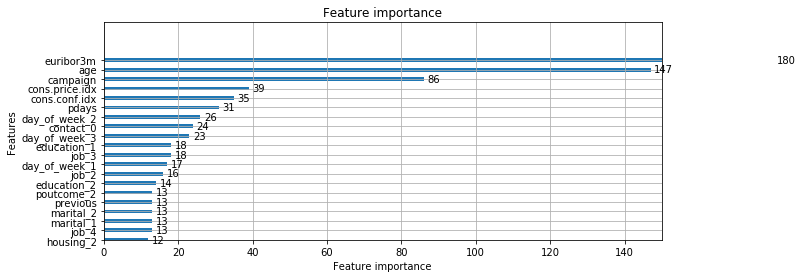

In [45]:
#Dimensionality reduction using feature importances
#features importance graph
ax = lgb.plot_importance(gbm, height = .4, 
                         max_num_features = 20,
                         ylabel='Features',
                         xlim = (0,150), ylim = (0,23), 
                         figsize = (10,4))
plt.show()

In [31]:
## For each feature of our dataset, the result of the following
# code snippet contains numbers of times a feature is used in a model.
sorted(gbm.feature_importances_,reverse=True)

[208,
 178,
 103,
 41,
 40,
 31,
 30,
 29,
 28,
 22,
 22,
 21,
 19,
 17,
 17,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 10,
 10,
 10,
 7,
 5,
 5,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [32]:
# The code below aims to find where at least 85% 
temp = 0 
total = sum(gbm.feature_importances_)
for feature in sorted(gbm.feature_importances_, reverse=True):
    temp+=feature
    if temp/total >= 0.85:
        print(feature,temp/total) # stop when we 
        break

16 0.8551020408163266


In [46]:
from sklearn.metrics import auc, accuracy_score, roc_auc_score
y_pred_prob = gbm.predict_proba(X_test)[:, 1]
auc_roc_0=str(roc_auc_score(y_test, y_pred_prob)) # store AUC score without dimensionality reduction
print('AUC without dimensionality reduction: \n' + auc_roc_0)

AUC without dimensionality reduction: 
0.7970940563604152


In [47]:
#Drop features to reduce dimensionality to save training time and space

X = X.drop(['marital','housing','loan','previous','default'], axis=1)


KeyError: "['marital' 'housing' 'loan' 'default'] not found in axis"

In [48]:
print(X)

       age  job_0  job_1  job_2  job_3  job_4  marital_0  marital_1  \
0       56      0      0      0      0      1          0          0   
1       57      0      0      0      1      0          0          0   
2       37      0      0      0      1      0          0          0   
3       40      0      0      0      1      1          0          0   
4       56      0      0      0      1      0          0          0   
5       45      0      0      0      1      0          0          0   
6       59      0      0      0      1      1          0          0   
7       41      0      0      1      0      0          0          0   
8       24      0      0      1      0      1          0          1   
9       25      0      0      0      1      0          0          1   
10      41      0      0      1      0      0          0          0   
11      25      0      0      0      1      0          0          1   
12      29      0      0      1      0      0          0          1   
13    

In [49]:
# Remake our test/train set with our reduced dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)

reduc_estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)

# Parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [x for x in range(20, 36, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}

gridsearch = GridSearchCV(reduc_estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)
print('Best parameters found by grid search are:', gridsearch.best_params_)

C:\Users\barba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's binary_logloss: 0.331057	valid_0's auc: 0.777138	valid_0's l1: 0.195212
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.318797	valid_0's auc: 0.779095	valid_0's l1: 0.191149
[3]	valid_0's binary_logloss: 0.310124	valid_0's auc: 0.778528	valid_0's l1: 0.187521
[4]	valid_0's binary_logloss: 0.303526	valid_0's auc: 0.782394	valid_0's l1: 0.184283
[5]	valid_0's binary_logloss: 0.297967	valid_0's auc: 0.78566	valid_0's l1: 0.181191
[6]	valid_0's binary_logloss: 0.293755	valid_0's auc: 0.788357	valid_0's l1: 0.178489
[7]	valid_0's binary_logloss: 0.290361	valid_0's auc: 0.790282	valid_0's l1: 0.176071
[8]	valid_0's binary_logloss: 0.287826	valid_0's auc: 0.790049	valid_0's l1: 0.173989
[9]	valid_0's binary_logloss: 0.285623	valid_0's auc: 0.789702	valid_0's l1: 0.172065
[10]	valid_0's binary_logloss: 0.283758	valid_0's auc: 0.78761	valid_0's l1: 0.170258
[11]	valid_0's binary_logloss: 0.282	valid_0's auc: 0.788367	valid_0's l1: 0.168

[1]	valid_0's binary_logloss: 0.331057	valid_0's auc: 0.777138	valid_0's l1: 0.195212
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.318797	valid_0's auc: 0.779095	valid_0's l1: 0.191149
[3]	valid_0's binary_logloss: 0.310124	valid_0's auc: 0.778528	valid_0's l1: 0.187521
[4]	valid_0's binary_logloss: 0.303526	valid_0's auc: 0.782394	valid_0's l1: 0.184283
[5]	valid_0's binary_logloss: 0.297967	valid_0's auc: 0.78566	valid_0's l1: 0.181191
[6]	valid_0's binary_logloss: 0.293755	valid_0's auc: 0.788357	valid_0's l1: 0.178489
[7]	valid_0's binary_logloss: 0.290361	valid_0's auc: 0.790282	valid_0's l1: 0.176071
[8]	valid_0's binary_logloss: 0.287826	valid_0's auc: 0.790049	valid_0's l1: 0.173989
[9]	valid_0's binary_logloss: 0.285623	valid_0's auc: 0.789702	valid_0's l1: 0.172065
[10]	valid_0's binary_logloss: 0.283758	valid_0's auc: 0.78761	valid_0's l1: 0.170258
[11]	valid_0's binary_logloss: 0.282	valid_0's auc: 0.788367	valid_0's l1: 0.168

[1]	valid_0's binary_logloss: 0.331057	valid_0's auc: 0.777138	valid_0's l1: 0.195212
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.318797	valid_0's auc: 0.779095	valid_0's l1: 0.191149
[3]	valid_0's binary_logloss: 0.310124	valid_0's auc: 0.778528	valid_0's l1: 0.187521
[4]	valid_0's binary_logloss: 0.303526	valid_0's auc: 0.782394	valid_0's l1: 0.184283
[5]	valid_0's binary_logloss: 0.297967	valid_0's auc: 0.78566	valid_0's l1: 0.181191
[6]	valid_0's binary_logloss: 0.293755	valid_0's auc: 0.788357	valid_0's l1: 0.178489
[7]	valid_0's binary_logloss: 0.290361	valid_0's auc: 0.790282	valid_0's l1: 0.176071
[8]	valid_0's binary_logloss: 0.287826	valid_0's auc: 0.790049	valid_0's l1: 0.173989
[9]	valid_0's binary_logloss: 0.285623	valid_0's auc: 0.789702	valid_0's l1: 0.172065
[10]	valid_0's binary_logloss: 0.283758	valid_0's auc: 0.78761	valid_0's l1: 0.170258
[11]	valid_0's binary_logloss: 0.282	valid_0's auc: 0.788367	valid_0's l1: 0.168

[1]	valid_0's binary_logloss: 0.331057	valid_0's auc: 0.777138	valid_0's l1: 0.195212
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.318797	valid_0's auc: 0.779095	valid_0's l1: 0.191149
[3]	valid_0's binary_logloss: 0.310124	valid_0's auc: 0.778528	valid_0's l1: 0.187521
[4]	valid_0's binary_logloss: 0.303526	valid_0's auc: 0.782394	valid_0's l1: 0.184283
[5]	valid_0's binary_logloss: 0.297967	valid_0's auc: 0.78566	valid_0's l1: 0.181191
[6]	valid_0's binary_logloss: 0.293755	valid_0's auc: 0.788357	valid_0's l1: 0.178489
[7]	valid_0's binary_logloss: 0.290361	valid_0's auc: 0.790282	valid_0's l1: 0.176071
[8]	valid_0's binary_logloss: 0.287826	valid_0's auc: 0.790049	valid_0's l1: 0.173989
[9]	valid_0's binary_logloss: 0.285623	valid_0's auc: 0.789702	valid_0's l1: 0.172065
[10]	valid_0's binary_logloss: 0.283758	valid_0's auc: 0.78761	valid_0's l1: 0.170258
[11]	valid_0's binary_logloss: 0.282	valid_0's auc: 0.788367	valid_0's l1: 0.168

[1]	valid_0's binary_logloss: 0.326411	valid_0's auc: 0.777138	valid_0's l1: 0.194065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.313021	valid_0's auc: 0.778965	valid_0's l1: 0.189146
[3]	valid_0's binary_logloss: 0.304042	valid_0's auc: 0.781426	valid_0's l1: 0.184915
[4]	valid_0's binary_logloss: 0.297498	valid_0's auc: 0.783401	valid_0's l1: 0.181132
[5]	valid_0's binary_logloss: 0.292529	valid_0's auc: 0.786767	valid_0's l1: 0.177807
[6]	valid_0's binary_logloss: 0.28908	valid_0's auc: 0.787438	valid_0's l1: 0.175024
[7]	valid_0's binary_logloss: 0.286146	valid_0's auc: 0.786488	valid_0's l1: 0.172478
[8]	valid_0's binary_logloss: 0.283252	valid_0's auc: 0.788639	valid_0's l1: 0.170046
[9]	valid_0's binary_logloss: 0.281548	valid_0's auc: 0.788215	valid_0's l1: 0.16819
[10]	valid_0's binary_logloss: 0.280118	valid_0's auc: 0.788376	valid_0's l1: 0.1665
[11]	valid_0's binary_logloss: 0.278934	valid_0's auc: 0.789768	valid_0's l1: 0.16

[1]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.776958	valid_0's l1: 0.193789
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.313186	valid_0's auc: 0.780666	valid_0's l1: 0.188894
[3]	valid_0's binary_logloss: 0.303991	valid_0's auc: 0.781569	valid_0's l1: 0.184509
[4]	valid_0's binary_logloss: 0.297252	valid_0's auc: 0.789152	valid_0's l1: 0.180747
[5]	valid_0's binary_logloss: 0.292161	valid_0's auc: 0.790329	valid_0's l1: 0.177354
[6]	valid_0's binary_logloss: 0.28846	valid_0's auc: 0.790668	valid_0's l1: 0.174413
[7]	valid_0's binary_logloss: 0.28431	valid_0's auc: 0.794801	valid_0's l1: 0.171604
[8]	valid_0's binary_logloss: 0.281875	valid_0's auc: 0.797557	valid_0's l1: 0.169284
[9]	valid_0's binary_logloss: 0.279922	valid_0's auc: 0.798741	valid_0's l1: 0.16733
[10]	valid_0's binary_logloss: 0.278148	valid_0's auc: 0.79953	valid_0's l1: 0.165519
[11]	valid_0's binary_logloss: 0.277317	valid_0's auc: 0.798437	valid_0's l1: 0.164

[1]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.776958	valid_0's l1: 0.193789
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.313186	valid_0's auc: 0.780666	valid_0's l1: 0.188894
[3]	valid_0's binary_logloss: 0.303991	valid_0's auc: 0.781569	valid_0's l1: 0.184509
[4]	valid_0's binary_logloss: 0.297252	valid_0's auc: 0.789152	valid_0's l1: 0.180747
[5]	valid_0's binary_logloss: 0.292161	valid_0's auc: 0.790329	valid_0's l1: 0.177354
[6]	valid_0's binary_logloss: 0.28846	valid_0's auc: 0.790668	valid_0's l1: 0.174413
[7]	valid_0's binary_logloss: 0.28431	valid_0's auc: 0.794801	valid_0's l1: 0.171604
[8]	valid_0's binary_logloss: 0.281875	valid_0's auc: 0.797557	valid_0's l1: 0.169284
[9]	valid_0's binary_logloss: 0.279922	valid_0's auc: 0.798741	valid_0's l1: 0.16733
[10]	valid_0's binary_logloss: 0.278148	valid_0's auc: 0.79953	valid_0's l1: 0.165519
[11]	valid_0's binary_logloss: 0.277317	valid_0's auc: 0.798437	valid_0's l1: 0.164

[1]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.776958	valid_0's l1: 0.193789
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.313186	valid_0's auc: 0.780666	valid_0's l1: 0.188894
[3]	valid_0's binary_logloss: 0.303991	valid_0's auc: 0.781569	valid_0's l1: 0.184509
[4]	valid_0's binary_logloss: 0.297252	valid_0's auc: 0.789152	valid_0's l1: 0.180747
[5]	valid_0's binary_logloss: 0.292161	valid_0's auc: 0.790329	valid_0's l1: 0.177354
[6]	valid_0's binary_logloss: 0.28846	valid_0's auc: 0.790668	valid_0's l1: 0.174413
[7]	valid_0's binary_logloss: 0.28431	valid_0's auc: 0.794801	valid_0's l1: 0.171604
[8]	valid_0's binary_logloss: 0.281875	valid_0's auc: 0.797557	valid_0's l1: 0.169284
[9]	valid_0's binary_logloss: 0.279922	valid_0's auc: 0.798741	valid_0's l1: 0.16733
[10]	valid_0's binary_logloss: 0.278148	valid_0's auc: 0.79953	valid_0's l1: 0.165519
[11]	valid_0's binary_logloss: 0.277317	valid_0's auc: 0.798437	valid_0's l1: 0.164

[1]	valid_0's binary_logloss: 0.32648	valid_0's auc: 0.776958	valid_0's l1: 0.193789
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.313186	valid_0's auc: 0.780666	valid_0's l1: 0.188894
[3]	valid_0's binary_logloss: 0.303991	valid_0's auc: 0.781569	valid_0's l1: 0.184509
[4]	valid_0's binary_logloss: 0.297252	valid_0's auc: 0.789152	valid_0's l1: 0.180747
[5]	valid_0's binary_logloss: 0.292161	valid_0's auc: 0.790329	valid_0's l1: 0.177354
[6]	valid_0's binary_logloss: 0.28846	valid_0's auc: 0.790668	valid_0's l1: 0.174413
[7]	valid_0's binary_logloss: 0.28431	valid_0's auc: 0.794801	valid_0's l1: 0.171604
[8]	valid_0's binary_logloss: 0.281875	valid_0's auc: 0.797557	valid_0's l1: 0.169284
[9]	valid_0's binary_logloss: 0.279922	valid_0's auc: 0.798741	valid_0's l1: 0.16733
[10]	valid_0's binary_logloss: 0.278148	valid_0's auc: 0.79953	valid_0's l1: 0.165519
[11]	valid_0's binary_logloss: 0.277317	valid_0's auc: 0.798437	valid_0's l1: 0.164

[1]	valid_0's binary_logloss: 0.32202	valid_0's auc: 0.776958	valid_0's l1: 0.192559
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.308115	valid_0's auc: 0.780922	valid_0's l1: 0.186843
[3]	valid_0's binary_logloss: 0.299345	valid_0's auc: 0.785018	valid_0's l1: 0.182003
[4]	valid_0's binary_logloss: 0.292104	valid_0's auc: 0.7918	valid_0's l1: 0.177774
[5]	valid_0's binary_logloss: 0.28733	valid_0's auc: 0.791544	valid_0's l1: 0.174163
[6]	valid_0's binary_logloss: 0.28314	valid_0's auc: 0.795054	valid_0's l1: 0.170761
[7]	valid_0's binary_logloss: 0.280573	valid_0's auc: 0.79848	valid_0's l1: 0.168137
[8]	valid_0's binary_logloss: 0.27847	valid_0's auc: 0.799623	valid_0's l1: 0.165894
[9]	valid_0's binary_logloss: 0.277022	valid_0's auc: 0.79921	valid_0's l1: 0.163889
[10]	valid_0's binary_logloss: 0.275992	valid_0's auc: 0.799542	valid_0's l1: 0.162271
[11]	valid_0's binary_logloss: 0.275139	valid_0's auc: 0.799478	valid_0's l1: 0.160807

[1]	valid_0's binary_logloss: 0.32202	valid_0's auc: 0.776958	valid_0's l1: 0.192559
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.308115	valid_0's auc: 0.780922	valid_0's l1: 0.186843
[3]	valid_0's binary_logloss: 0.299345	valid_0's auc: 0.785018	valid_0's l1: 0.182003
[4]	valid_0's binary_logloss: 0.292104	valid_0's auc: 0.7918	valid_0's l1: 0.177774
[5]	valid_0's binary_logloss: 0.28733	valid_0's auc: 0.791544	valid_0's l1: 0.174163
[6]	valid_0's binary_logloss: 0.28314	valid_0's auc: 0.795054	valid_0's l1: 0.170761
[7]	valid_0's binary_logloss: 0.280573	valid_0's auc: 0.79848	valid_0's l1: 0.168137
[8]	valid_0's binary_logloss: 0.27847	valid_0's auc: 0.799623	valid_0's l1: 0.165894
[9]	valid_0's binary_logloss: 0.277022	valid_0's auc: 0.79921	valid_0's l1: 0.163889
[10]	valid_0's binary_logloss: 0.275992	valid_0's auc: 0.799542	valid_0's l1: 0.162271
[11]	valid_0's binary_logloss: 0.275139	valid_0's auc: 0.799478	valid_0's l1: 0.160807

[1]	valid_0's binary_logloss: 0.32202	valid_0's auc: 0.776958	valid_0's l1: 0.192559
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.308115	valid_0's auc: 0.780922	valid_0's l1: 0.186843
[3]	valid_0's binary_logloss: 0.299345	valid_0's auc: 0.785018	valid_0's l1: 0.182003
[4]	valid_0's binary_logloss: 0.292104	valid_0's auc: 0.7918	valid_0's l1: 0.177774
[5]	valid_0's binary_logloss: 0.28733	valid_0's auc: 0.791544	valid_0's l1: 0.174163
[6]	valid_0's binary_logloss: 0.28314	valid_0's auc: 0.795054	valid_0's l1: 0.170761
[7]	valid_0's binary_logloss: 0.280573	valid_0's auc: 0.79848	valid_0's l1: 0.168137
[8]	valid_0's binary_logloss: 0.27847	valid_0's auc: 0.799623	valid_0's l1: 0.165894
[9]	valid_0's binary_logloss: 0.277022	valid_0's auc: 0.79921	valid_0's l1: 0.163889
[10]	valid_0's binary_logloss: 0.275992	valid_0's auc: 0.799542	valid_0's l1: 0.162271
[11]	valid_0's binary_logloss: 0.275139	valid_0's auc: 0.799478	valid_0's l1: 0.160807

[1]	valid_0's binary_logloss: 0.32202	valid_0's auc: 0.776958	valid_0's l1: 0.192559
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.308115	valid_0's auc: 0.780922	valid_0's l1: 0.186843
[3]	valid_0's binary_logloss: 0.299345	valid_0's auc: 0.785018	valid_0's l1: 0.182003
[4]	valid_0's binary_logloss: 0.292104	valid_0's auc: 0.7918	valid_0's l1: 0.177774
[5]	valid_0's binary_logloss: 0.28733	valid_0's auc: 0.791544	valid_0's l1: 0.174163
[6]	valid_0's binary_logloss: 0.28314	valid_0's auc: 0.795054	valid_0's l1: 0.170761
[7]	valid_0's binary_logloss: 0.280573	valid_0's auc: 0.79848	valid_0's l1: 0.168137
[8]	valid_0's binary_logloss: 0.27847	valid_0's auc: 0.799623	valid_0's l1: 0.165894
[9]	valid_0's binary_logloss: 0.277022	valid_0's auc: 0.79921	valid_0's l1: 0.163889
[10]	valid_0's binary_logloss: 0.275992	valid_0's auc: 0.799542	valid_0's l1: 0.162271
[11]	valid_0's binary_logloss: 0.275139	valid_0's auc: 0.799478	valid_0's l1: 0.160807

[1]	valid_0's binary_logloss: 0.317787	valid_0's auc: 0.777138	valid_0's l1: 0.191748
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.303864	valid_0's auc: 0.77899	valid_0's l1: 0.18538
[3]	valid_0's binary_logloss: 0.29515	valid_0's auc: 0.784339	valid_0's l1: 0.180179
[4]	valid_0's binary_logloss: 0.288931	valid_0's auc: 0.789563	valid_0's l1: 0.175748
[5]	valid_0's binary_logloss: 0.284895	valid_0's auc: 0.790537	valid_0's l1: 0.172139
[6]	valid_0's binary_logloss: 0.282201	valid_0's auc: 0.787491	valid_0's l1: 0.169147
[7]	valid_0's binary_logloss: 0.280469	valid_0's auc: 0.788364	valid_0's l1: 0.166678
[8]	valid_0's binary_logloss: 0.278857	valid_0's auc: 0.789988	valid_0's l1: 0.164473
[9]	valid_0's binary_logloss: 0.278065	valid_0's auc: 0.789718	valid_0's l1: 0.162942
[10]	valid_0's binary_logloss: 0.277606	valid_0's auc: 0.788555	valid_0's l1: 0.161531
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.284895	valid_0

[1]	valid_0's binary_logloss: 0.317629	valid_0's auc: 0.777371	valid_0's l1: 0.191369
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.304005	valid_0's auc: 0.777371	valid_0's l1: 0.185038
[3]	valid_0's binary_logloss: 0.294506	valid_0's auc: 0.785766	valid_0's l1: 0.179457
[4]	valid_0's binary_logloss: 0.288213	valid_0's auc: 0.786733	valid_0's l1: 0.174879
[5]	valid_0's binary_logloss: 0.28417	valid_0's auc: 0.787777	valid_0's l1: 0.171137
[6]	valid_0's binary_logloss: 0.280134	valid_0's auc: 0.796048	valid_0's l1: 0.167809
[7]	valid_0's binary_logloss: 0.278061	valid_0's auc: 0.796655	valid_0's l1: 0.165268
[8]	valid_0's binary_logloss: 0.276734	valid_0's auc: 0.795709	valid_0's l1: 0.163064
[9]	valid_0's binary_logloss: 0.27526	valid_0's auc: 0.799145	valid_0's l1: 0.161231
[10]	valid_0's binary_logloss: 0.274525	valid_0's auc: 0.801382	valid_0's l1: 0.159542
[11]	valid_0's binary_logloss: 0.273854	valid_0's auc: 0.801235	valid_0's l1: 0.

[1]	valid_0's binary_logloss: 0.317773	valid_0's auc: 0.776958	valid_0's l1: 0.191319
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.303347	valid_0's auc: 0.780766	valid_0's l1: 0.184866
[3]	valid_0's binary_logloss: 0.294535	valid_0's auc: 0.787032	valid_0's l1: 0.179524
[4]	valid_0's binary_logloss: 0.288835	valid_0's auc: 0.788457	valid_0's l1: 0.175098
[5]	valid_0's binary_logloss: 0.283994	valid_0's auc: 0.793881	valid_0's l1: 0.17124
[6]	valid_0's binary_logloss: 0.280774	valid_0's auc: 0.796743	valid_0's l1: 0.168072
[7]	valid_0's binary_logloss: 0.278509	valid_0's auc: 0.800489	valid_0's l1: 0.165578
[8]	valid_0's binary_logloss: 0.276927	valid_0's auc: 0.800977	valid_0's l1: 0.163331
[9]	valid_0's binary_logloss: 0.275416	valid_0's auc: 0.801609	valid_0's l1: 0.161498
[10]	valid_0's binary_logloss: 0.274844	valid_0's auc: 0.799689	valid_0's l1: 0.160091
[11]	valid_0's binary_logloss: 0.274258	valid_0's auc: 0.799728	valid_0's l1: 0

[1]	valid_0's binary_logloss: 0.313753	valid_0's auc: 0.776958	valid_0's l1: 0.19007
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.299358	valid_0's auc: 0.78102	valid_0's l1: 0.182945
[3]	valid_0's binary_logloss: 0.290943	valid_0's auc: 0.790789	valid_0's l1: 0.177316
[4]	valid_0's binary_logloss: 0.285014	valid_0's auc: 0.791434	valid_0's l1: 0.172501
[5]	valid_0's binary_logloss: 0.281432	valid_0's auc: 0.792416	valid_0's l1: 0.168628
[6]	valid_0's binary_logloss: 0.279436	valid_0's auc: 0.79416	valid_0's l1: 0.165748
[7]	valid_0's binary_logloss: 0.277207	valid_0's auc: 0.799135	valid_0's l1: 0.163105
[8]	valid_0's binary_logloss: 0.276032	valid_0's auc: 0.79839	valid_0's l1: 0.16095
[9]	valid_0's binary_logloss: 0.275498	valid_0's auc: 0.798731	valid_0's l1: 0.159501
[10]	valid_0's binary_logloss: 0.275271	valid_0's auc: 0.796777	valid_0's l1: 0.158201
[11]	valid_0's binary_logloss: 0.27531	valid_0's auc: 0.796421	valid_0's l1: 0.1573

[1]	valid_0's binary_logloss: 0.313753	valid_0's auc: 0.776958	valid_0's l1: 0.19007
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.299358	valid_0's auc: 0.78102	valid_0's l1: 0.182945
[3]	valid_0's binary_logloss: 0.290943	valid_0's auc: 0.790789	valid_0's l1: 0.177316
[4]	valid_0's binary_logloss: 0.285014	valid_0's auc: 0.791434	valid_0's l1: 0.172501
[5]	valid_0's binary_logloss: 0.281432	valid_0's auc: 0.792416	valid_0's l1: 0.168628
[6]	valid_0's binary_logloss: 0.279436	valid_0's auc: 0.79416	valid_0's l1: 0.165748
[7]	valid_0's binary_logloss: 0.277207	valid_0's auc: 0.799135	valid_0's l1: 0.163105
[8]	valid_0's binary_logloss: 0.276032	valid_0's auc: 0.79839	valid_0's l1: 0.16095
[9]	valid_0's binary_logloss: 0.275498	valid_0's auc: 0.798731	valid_0's l1: 0.159501
[10]	valid_0's binary_logloss: 0.275271	valid_0's auc: 0.796777	valid_0's l1: 0.158201
[11]	valid_0's binary_logloss: 0.27531	valid_0's auc: 0.796421	valid_0's l1: 0.1573

[1]	valid_0's binary_logloss: 0.313753	valid_0's auc: 0.776958	valid_0's l1: 0.19007
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.299358	valid_0's auc: 0.78102	valid_0's l1: 0.182945
[3]	valid_0's binary_logloss: 0.290943	valid_0's auc: 0.790789	valid_0's l1: 0.177316
[4]	valid_0's binary_logloss: 0.285014	valid_0's auc: 0.791434	valid_0's l1: 0.172501
[5]	valid_0's binary_logloss: 0.281432	valid_0's auc: 0.792416	valid_0's l1: 0.168628
[6]	valid_0's binary_logloss: 0.279436	valid_0's auc: 0.79416	valid_0's l1: 0.165748
[7]	valid_0's binary_logloss: 0.277207	valid_0's auc: 0.799135	valid_0's l1: 0.163105
[8]	valid_0's binary_logloss: 0.276032	valid_0's auc: 0.79839	valid_0's l1: 0.16095
[9]	valid_0's binary_logloss: 0.275498	valid_0's auc: 0.798731	valid_0's l1: 0.159501
[10]	valid_0's binary_logloss: 0.275271	valid_0's auc: 0.796777	valid_0's l1: 0.158201
[11]	valid_0's binary_logloss: 0.27531	valid_0's auc: 0.796421	valid_0's l1: 0.1573

[1]	valid_0's binary_logloss: 0.313753	valid_0's auc: 0.776958	valid_0's l1: 0.19007
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.299358	valid_0's auc: 0.78102	valid_0's l1: 0.182945
[3]	valid_0's binary_logloss: 0.290943	valid_0's auc: 0.790789	valid_0's l1: 0.177316
[4]	valid_0's binary_logloss: 0.285014	valid_0's auc: 0.791434	valid_0's l1: 0.172501
[5]	valid_0's binary_logloss: 0.281432	valid_0's auc: 0.792416	valid_0's l1: 0.168628
[6]	valid_0's binary_logloss: 0.279436	valid_0's auc: 0.79416	valid_0's l1: 0.165748
[7]	valid_0's binary_logloss: 0.277207	valid_0's auc: 0.799135	valid_0's l1: 0.163105
[8]	valid_0's binary_logloss: 0.276032	valid_0's auc: 0.79839	valid_0's l1: 0.16095
[9]	valid_0's binary_logloss: 0.275498	valid_0's auc: 0.798731	valid_0's l1: 0.159501
[10]	valid_0's binary_logloss: 0.275271	valid_0's auc: 0.796777	valid_0's l1: 0.158201
[11]	valid_0's binary_logloss: 0.27531	valid_0's auc: 0.796421	valid_0's l1: 0.1573

In [50]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2, metric = 'l1', 
                        n_estimators = 20)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's binary_logloss: 0.313583	valid_0's auc: 0.777546	valid_0's l1: 0.190293
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.299051	valid_0's auc: 0.779902	valid_0's l1: 0.183096
[3]	valid_0's binary_logloss: 0.290043	valid_0's auc: 0.789001	valid_0's l1: 0.17723
[4]	valid_0's binary_logloss: 0.284396	valid_0's auc: 0.790438	valid_0's l1: 0.17244
[5]	valid_0's binary_logloss: 0.280891	valid_0's auc: 0.791483	valid_0's l1: 0.168661
[6]	valid_0's binary_logloss: 0.278212	valid_0's auc: 0.791785	valid_0's l1: 0.165501
[7]	valid_0's binary_logloss: 0.276959	valid_0's auc: 0.791771	valid_0's l1: 0.163218
[8]	valid_0's binary_logloss: 0.27554	valid_0's auc: 0.793122	valid_0's l1: 0.161087
[9]	valid_0's binary_logloss: 0.274339	valid_0's auc: 0.795418	valid_0's l1: 0.159221
[10]	valid_0's binary_logloss: 0.273883	valid_0's auc: 0.796062	valid_0's l1: 0.158
[11]	valid_0's binary_logloss: 0.273293	valid_0's auc: 0.796666	valid_0's l1: 0.1568

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.2, max_depth=-1,
        metric='l1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=20, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [51]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred))
print('The roc_auc_score of prediction is:', roc_auc_score(y_test, y_pred))
print('The null acccuracy is:', max(y_test.mean(), 1 - y_test.mean()))

The accuracy of prediction is: 0.9021607186210245
The roc_auc_score of prediction is: 0.6110092702430632
The null acccuracy is: 0.8875940762320952


In [52]:
y_pred_prob = gbm.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.08565841, 0.02886482, 0.04320079, ..., 0.10920716, 0.12572849,
       0.04653877])

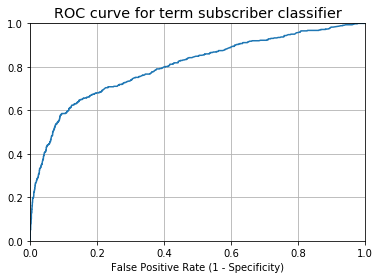

In [53]:
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for term subscriber classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.grid(True)

In [54]:
auc_roc_1 = str(roc_auc_score(y_test, y_pred_prob))
print('AUC with dimensionality reduction: \n' + auc_roc_1)
print('AUC without dimensionality reduction: \n' + auc_roc_0)

AUC with dimensionality reduction: 
0.8029060191596051
AUC without dimensionality reduction: 
0.7970940563604152


In [117]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

#Basic terminology
#True Positives (TP): we correctly predicted that they would default.
#262
#True Negatives (TN): we correctly predicted that they won't default.
#3538
#False Positives (FP): we incorrectly predicted that they did default.
#118
#Falsely predict positive
#Type I error
#False Negatives (FN): we incorrectly predicted that they didn't default.
#201
#Falsely predict negative
#Type II error

[[3607   49]
 [ 354  109]]


In [118]:
score = gbm.score(X_test, y_test)
print(score)

0.9021607186210245
